In [1]:
import pandas as pd
from neuralprophet import NeuralProphet

In [2]:
df = pd.read_csv('../example_data/wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [3]:
m = NeuralProphet()
metrics = m.fit(df, freq="D")
metrics.tail()

INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet - _auto_learning_rate: model_complexity 4.094344562222101
Epoch[40/40]: 100%|██████████| 40/40 [00:02<00:00, 18.65it/s, SmoothL1Loss=0.00682, MAE=0.422, RegLoss=0]


,SmoothL1Loss,MAE,RegLoss
35,0.007707,0.449503,0.0
36,0.007434,0.445876,0.0
37,0.007267,0.438949,0.0
38,0.007495,0.446528,0.0
39,0.006818,0.422200,0.0


In [4]:
future = m.make_future_dataframe(df, future_periods=730, n_historic_predictions=len(df))
future.tail()

,ds,y,t,y_scaled
3630,2018-01-15,NaN,1.245022,NaN
3631,2018-01-16,NaN,1.245359,NaN
3632,2018-01-17,NaN,1.245697,NaN
3633,2018-01-18,NaN,1.246034,NaN
3634,2018-01-19,NaN,1.246372,NaN


In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat1']].tail()
# forecast.tail()

,ds,yhat1
3630,2018-01-15,8.143270
3631,2018-01-16,7.783713
3632,2018-01-17,7.683769
3633,2018-01-18,7.818388
3634,2018-01-19,7.555986


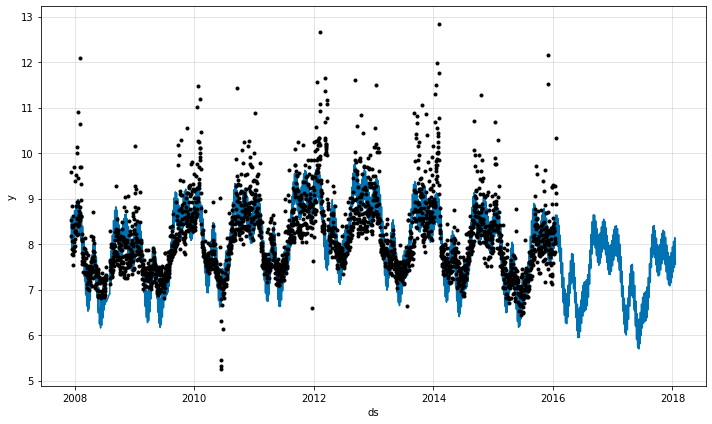

In [6]:
fig1 = m.plot(forecast)

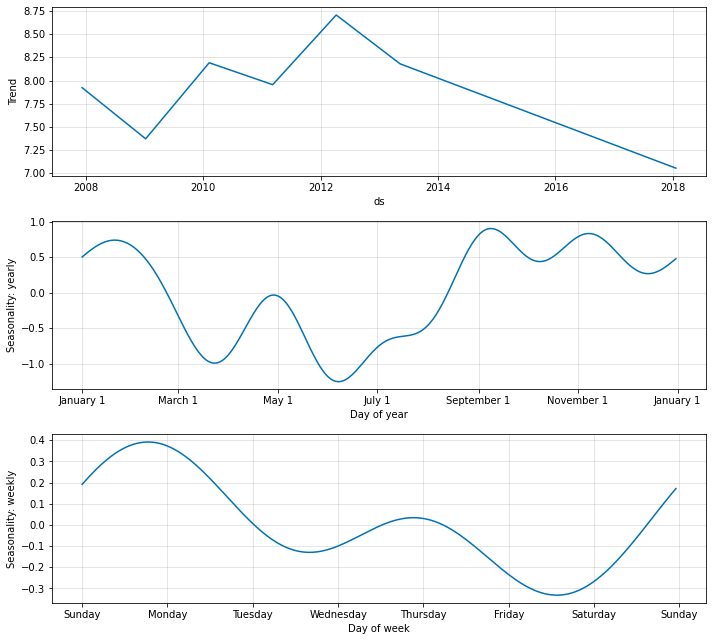

In [7]:
fig2 = m.plot_components(forecast)

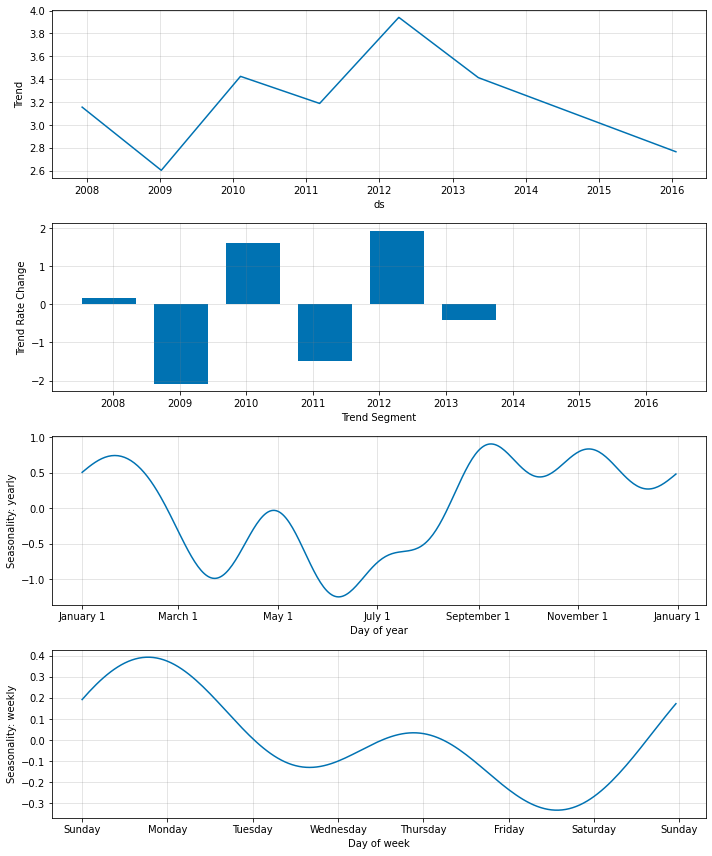

In [8]:
fig2 = m.plot_parameters()